In [1]:
# Importing Libraries needed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
atlantic_hurricanes = pd.read_csv('atlantic.csv')
atlantic_hurricanes.head

df = pd.DataFrame(atlantic_hurricanes)
df.shape #shows dataframe size - rows, columns

(49105, 22)

In [3]:
#Filtering out the years

booleans =[]

for date in df['Date']:
    if date > 19700000:
        booleans.append(True)
    else: 
        booleans.append(False)
date_range = pd.Series(booleans)
new_df = df[date_range]

new_df.shape
new_df #filtered by date 1970-2015

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
29402,AL011970,ALMA,19700517,1800,,TD,11.5N,79.0W,25,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29403,AL011970,ALMA,19700518,0,,TD,11.7N,79.2W,25,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29404,AL011970,ALMA,19700518,600,,TD,12.1N,79.7W,25,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29405,AL011970,ALMA,19700518,1200,,TD,12.3N,80.1W,25,1007,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29406,AL011970,ALMA,19700518,1800,,TD,12.5N,80.5W,25,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0


In [4]:
#dropping unnecessary titles
new_df.drop(['ID', 'Time' ,'Name', 'Minimum Pressure', 'Event'], axis = 1)

,Date,Status,Latitude,Longitude,Maximum Wind,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
29402,19700517,TD,11.5N,79.0W,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29403,19700518,TD,11.7N,79.2W,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29404,19700518,TD,12.1N,79.7W,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29405,19700518,TD,12.3N,80.1W,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
29406,19700518,TD,12.5N,80.5W,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,20151112,EX,41.3N,50.4W,55,220,220,180,120,120,120,60,0,0,0,0,0
49101,20151112,EX,41.9N,49.9W,55,220,220,180,120,120,120,60,0,0,0,0,0
49102,20151113,EX,41.5N,49.2W,50,540,520,200,220,120,120,60,0,0,0,0,0
49103,20151113,EX,40.8N,47.5W,45,620,460,180,220,0,0,0,0,0,0,0,0


In [5]:
#removing Hemisphere tags from coordiantes:
new_df['Longitude'] = new_df['Longitude'].map(lambda x: x.rstrip('W'))
new_df['Latitude'] = new_df['Latitude'].map(lambda x: x.rstrip('N'))
new_df['Latitude'] = new_df['Latitude'].map(lambda x: x.rstrip('S'))
new_df['Longitude'] = new_df['Longitude'].map(lambda x: x.rstrip('E'))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [7]:
#converting Latitude and Longitude to floats:
new_df['Latitude'] = new_df['Latitude'].astype(float)
new_df['Longitude'] = new_df['Longitude'].astype(float)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
#filtering outside latitudes
lat_filtered_df = new_df[(new_df['Latitude'].astype(float) >= float(9)) & (new_df['Latitude'].astype(float) <= float(26))]

print(lat_filtered_df.shape)

#filtering out longitude by coordinate
#convert longitude to negative
lat_filtered_df['Longitude'] = (lat_filtered_df['Longitude'] * -1)
lat_long_filtered_df = lat_filtered_df[(lat_filtered_df['Longitude'] >= -86) & (lat_filtered_df['Longitude'] <= float(-56))]
print(lat_long_filtered_df.shape)

(9910, 22)
(4301, 22)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
#Converting all data to strings so can be searched
all_columns = list(lat_long_filtered_df) # Creates list of all column headers
lat_long_filtered_df[all_columns] = lat_long_filtered_df[all_columns].astype(str)

#Converting all '-999' null values to 'NaN' which Python can automatically remove:
lat_long_filtered_df = lat_long_filtered_df.replace('-999', np.nan)

#the year 1967 has '-99' as maximum wind speed values - these must also be changed
lat_long_filtered_df = lat_long_filtered_df.replace('-99', np.nan)
lat_long_filtered_df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
29402,AL011970,ALMA,19700517,1800,,TD,11.5,-79.0,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29403,AL011970,ALMA,19700518,0,,TD,11.7,-79.2,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29404,AL011970,ALMA,19700518,600,,TD,12.1,-79.7,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29405,AL011970,ALMA,19700518,1200,,TD,12.3,-80.1,25,1007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29406,AL011970,ALMA,19700518,1800,,TD,12.5,-80.5,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49085,AL122015,KATE,20151108,1800,,TD,22.2,-71.5,30,1010,...,0,0,0,0,0,0,0,0,0,0
49086,AL122015,KATE,20151109,0,,TD,22.8,-72.6,30,1010,...,0,0,0,0,0,0,0,0,0,0
49087,AL122015,KATE,20151109,600,,TS,23.4,-73.7,35,1010,...,0,30,0,0,0,0,0,0,0,0
49088,AL122015,KATE,20151109,1200,,TS,24.1,-74.8,40,1008,...,0,30,0,0,0,0,0,0,0,0


In [10]:
#Changing date format:
import datetime as t
#df['DateTime'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

lat_long_filtered_df['Date'] = pd.to_datetime(lat_long_filtered_df['Date'].astype(str), format = '%Y %m %d')
lat_long_filtered_df

#adding year column

lat_long_filtered_df['Year'] = lat_long_filtered_df['Date'].map(lambda x: x.year)

lat_long_filtered_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
29402,AL011970,ALMA,1970-05-17,1800,,TD,11.5,-79.0,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29403,AL011970,ALMA,1970-05-18,0,,TD,11.7,-79.2,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29404,AL011970,ALMA,1970-05-18,600,,TD,12.1,-79.7,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29405,AL011970,ALMA,1970-05-18,1200,,TD,12.3,-80.1,25,1007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29406,AL011970,ALMA,1970-05-18,1800,,TD,12.5,-80.5,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49085,AL122015,KATE,2015-11-08,1800,,TD,22.2,-71.5,30,1010,...,0,0,0,0,0,0,0,0,0,2015
49086,AL122015,KATE,2015-11-09,0,,TD,22.8,-72.6,30,1010,...,0,0,0,0,0,0,0,0,0,2015
49087,AL122015,KATE,2015-11-09,600,,TS,23.4,-73.7,35,1010,...,30,0,0,0,0,0,0,0,0,2015
49088,AL122015,KATE,2015-11-09,1200,,TS,24.1,-74.8,40,1008,...,30,0,0,0,0,0,0,0,0,2015


In [11]:
#checking for negative values
negatives =[]
for i in lat_long_filtered_df['Maximum Wind']:
    if float(i) < 0:
        negatives.append(i)
        
print(negatives)

[]


In [13]:
#dropping duplicate storms

lat_long_filtered_df = lat_long_filtered_df.sort_values(by='Maximum Wind', ascending=False)
lat_long_filtered_df = lat_long_filtered_df.drop_duplicates(subset='Name', keep="first")

#resort by year
lat_long_filtered_df = lat_long_filtered_df.sort_values(by ='Year', ascending = True)
lat_long_filtered_df.shape

lat_long_filtered_df
#left with 177 storms over 45 year period

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
29586,AL091970,DOROTHY,1970-08-20,1200,,TS,13.9,-59.5,60,998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29664,AL131970,FELICE,1970-09-14,1800,,TD,25.8,-85.2,30,1008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29488,AL041970,CELIA,1970-08-01,1200,,TS,23.3,-85.8,45,993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29443,AL021970,BECKY,1970-07-19,1200,,TD,19.4,-85.2,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
29414,AL011970,ALMA,1970-05-20,1800,,HU,17.2,-81.6,70,993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,AL162012,PATTY,2012-10-12,1200,,TS,25.3,-72.2,40,1006,...,30,0,0,0,0,0,0,0,0,2012
48192,AL042013,DORIAN,2013-07-28,600,,DB,19.4,-56.8,35,1013,...,60,0,0,0,0,0,0,0,0,2013
48704,AL082014,GONZALO,2014-10-14,1200,,HU,19.9,-64.8,95,973,...,90,30,30,30,30,20,15,10,20,2014
48587,AL042014,CRISTOBAL,2014-08-26,600,,HU,25.6,-72.0,65,989,...,30,50,90,0,0,25,40,0,0,2014


In [14]:
#averages 

#average storms per year

#total number of storms = 177 ; years = 45 

print(177/45)

#average wind speed over 65 years

print(lat_long_filtered_df['Maximum Wind'].sum()/177)

3.933333333333333


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [15]:
#creating dataframe of number of storms per year

number_of_storms={}


count = lat_long_filtered_df['Year'].value_counts()




count_df = pd.DataFrame(count)

count_df = count_df.reset_index()



count_df = count_df.rename(columns={"index": "Year", "Year": "Count"})

count_df = count_df.sort_values(by = "Year", ascending = True)
count_df

,Year,Count
5,1970,6
4,1971,7
29,1972,2
15,1973,4
19,1974,4
11,1975,5
16,1976,4
40,1977,1
14,1978,5
25,1979,3


In [16]:
#create averages
lat_long_filtered_df['Maximum Wind'] = lat_long_filtered_df['Maximum Wind'].astype(float)
lat_long_filtered_df.Year = lat_long_filtered_df.Year.astype(int)


grouped_df = lat_long_filtered_df.groupby(['Year'])

described_df = grouped_df.describe()

described_df = described_df.reset_index()


described_df = pd.DataFrame(described_df)

described_df.columns = ['Year', 'Count', "Mean", 'std', 'min', '25%', '50%', '75%', 'Max']

described_df

,Year,Count,Mean,std,min,25%,50%,75%,Max
0,1970,6.0,44.166667,17.440375,30.0,30.00,37.5,56.25,70.0
1,1971,7.0,45.714286,24.053512,25.0,27.50,35.0,57.50,90.0
2,1972,2.0,52.500000,31.819805,30.0,41.25,52.5,63.75,75.0
3,1973,4.0,46.250000,16.007811,30.0,33.75,47.5,60.00,60.0
4,1974,4.0,68.750000,28.686524,30.0,56.25,75.0,87.50,95.0
5,1975,5.0,50.000000,26.220221,20.0,25.00,60.0,65.00,80.0
6,1976,4.0,51.250000,13.768926,35.0,42.50,52.5,61.25,65.0
7,1977,1.0,50.000000,NaN,50.0,50.00,50.0,50.00,50.0
8,1978,5.0,58.000000,21.679483,40.0,45.00,55.0,55.00,95.0
9,1979,3.0,75.000000,22.912878,50.0,65.00,80.0,87.50,95.0


In [17]:
#adding month column to new dataframe
month_df = lat_long_filtered_df
month_df = month_df.drop(['Year'], axis=1)

month_df['Month'] = month_df['Date'].map(lambda x: x.month)

In [18]:
#group by month

month_df['Maximum Wind'] = month_df['Maximum Wind'].astype(float)
month_df.Month = month_df.Month.astype(int)

grouped_df_month = month_df.groupby(['Month'])

described_df_month = grouped_df_month.describe()

described_df_month = described_df_month.reset_index()


described_df_month= pd.DataFrame(described_df_month)

described_df_month.columns = ['Month', 'Count', "Mean", 'std', 'min', '25%', '50%', '75%', 'Max']

described_df_month

,Month,Count,Mean,std,min,25%,50%,75%,Max
0,4,1.0,45.000000,NaN,45.0,45.00,45.0,45.00,45.0
1,5,1.0,70.000000,NaN,70.0,70.00,70.0,70.00,70.0
2,6,7.0,56.428571,13.451854,40.0,50.00,50.0,65.00,75.0
3,7,12.0,55.416667,27.671641,20.0,30.00,50.0,78.75,95.0
4,8,40.0,64.750000,26.383513,25.0,45.00,60.0,95.00,125.0
5,9,63.0,68.968254,27.032817,20.0,45.00,80.0,95.00,120.0
6,10,39.0,62.051282,25.254441,25.0,40.00,60.0,90.00,95.0
7,11,12.0,71.250000,17.980419,45.0,55.00,72.5,86.25,95.0
8,12,2.0,52.500000,3.535534,50.0,51.25,52.5,53.75,55.0


In [19]:
#import colours
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv     

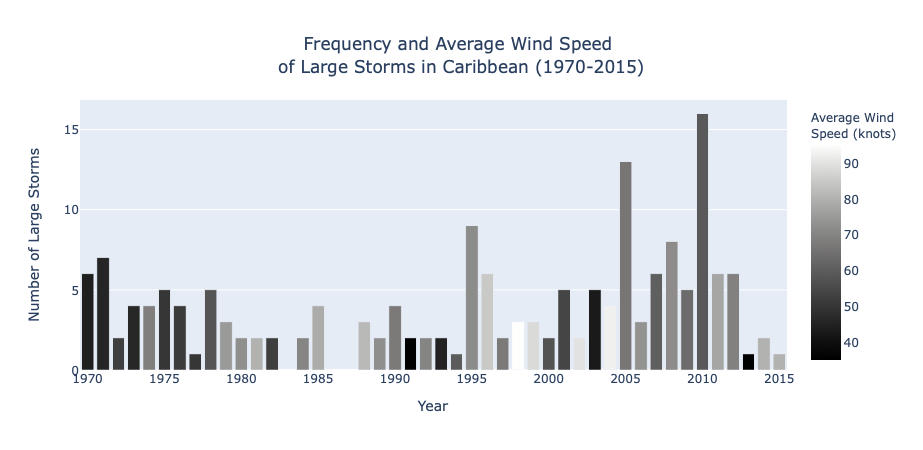

In [24]:
#creating bar chart, of year, count, and average speed 
import plotly.express as px

fig_1 = px.bar(described_df, 
                 x= 'Year',
                 y='Count', 
                 color = 'Mean',
                 color_continuous_scale=px.colors.sequential.gray,
                 title = 'Frequency and Average Wind Speed <br>of Large Storms in Caribbean (1970-2015)',
                 labels={'Count':'Number of Large Storms', 'Mean' : 'Average Wind <br> Speed (knots)'}
                )

fig_1.update_layout(title_x=0.5)
fig_1.show()

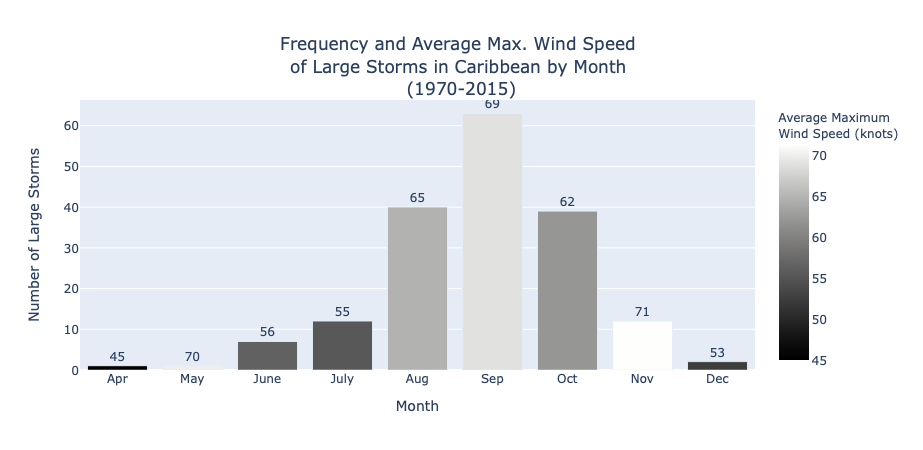

In [25]:
#creating bar chart, of month, count, and average speed 
import plotly.express as px

fig_2 = px.bar(described_df_month, 
                 x= 'Month',
                 y='Count', 
                 color = 'Mean',
                 color_continuous_scale=px.colors.sequential.gray,
                 title = 'Frequency and Average Max. Wind Speed <br> of Large Storms in Caribbean by Month <br> (1970-2015) <br>',
                 text = 'Mean',
                 labels={'Count':'Number of Large Storms', 'Mean' : 'Average Maximum <br> Wind Speed (knots)'}
                )

fig_2.update_layout(
                    title_x=0.5,
                    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                                )
                    )
fig_2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_2.show()

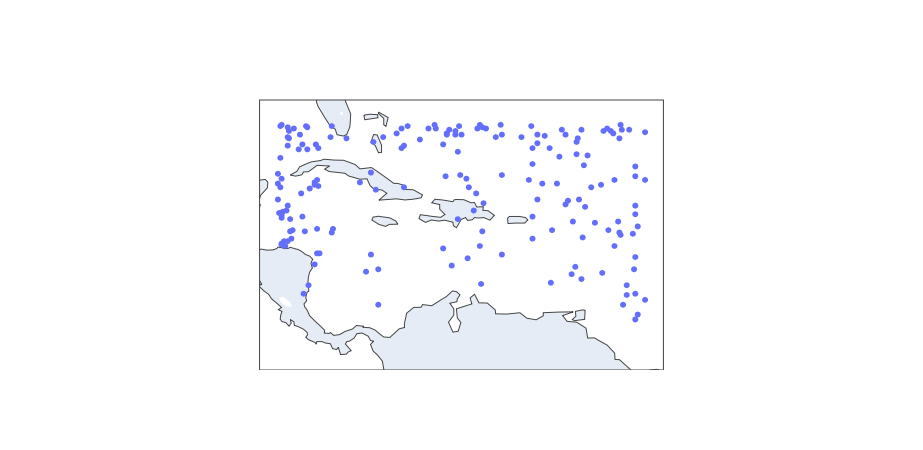

In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    
    lat = lat_long_filtered_df['Latitude'],
    lon = lat_long_filtered_df['Longitude'],

)
                )


fig.update_geos(
    center=dict(lon=-71, lat= 17),
    lataxis_range=[7, 29], lonaxis_range=[-88, -55]
                )

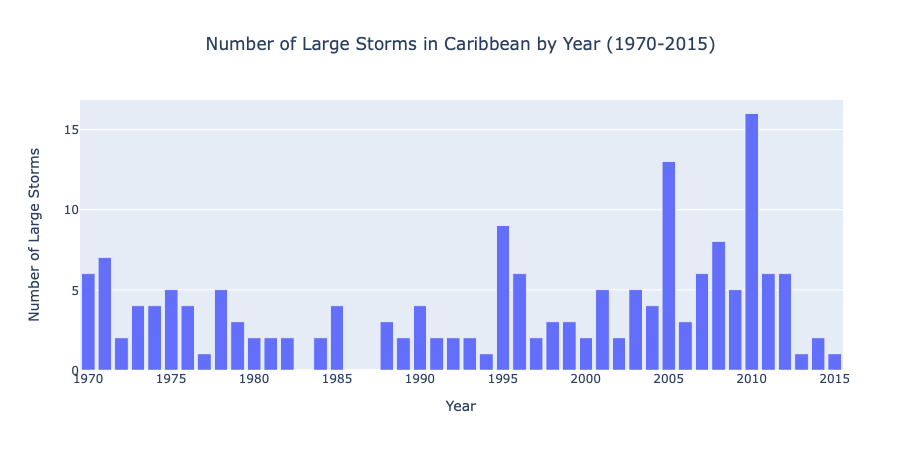

In [27]:
import plotly.express as px

fig_num = px.bar(count_df, 
                 x='Year', 
                 y='Count', 
                 title = 'Number of Large Storms in Caribbean by Year (1970-2015)',
                 labels={'Count':'Number of Large Storms'}
                )

fig_num.update_layout(title_x=0.5)
fig_num.show()

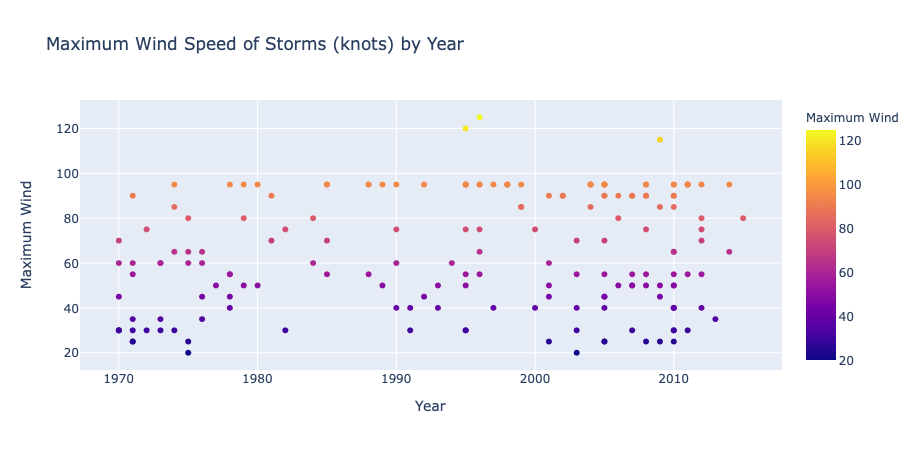

In [28]:
fig5 = px.scatter(lat_long_filtered_df, x="Year", y="Maximum Wind", color='Maximum Wind',
                 title="Maximum Wind Speed of Storms (knots) by Year")

fig5.show()